### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Import data
path = r'C:\Users\Logan\OneDrive\Desktop\Data Immersion\Achievement 6_Advanced Analytics and Dashboard Design'

df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','6.1_Telecom Customer Churn_Cleaned.csv'))

In [3]:
# Shape and Columns
print('# of Rows: {} / # of Columns: {}'.format(df.shape[0], df.shape[1]))
print('Columns are: '+ str(list(df.columns)))
df.head()

# of Rows: 7043 / # of Columns: 41
Columns are: ['Unnamed: 0', 'Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason', 'State', 'Country']


,Unnamed: 0,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,State,Country
0,0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,...,593.30,0.00,0,381.51,974.81,Stayed,Not Provided,Not Provided,California,United States
1,1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,...,542.40,38.33,10,96.21,610.28,Stayed,Not Provided,Not Provided,California,United States
2,2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,...,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,California,United States
3,3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,...,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,California,United States
4,4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,...,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,California,United States


In [4]:
df['Customer Status N'] = pd.factorize(df['Customer Status'])[0]

In [5]:
# number stayed, churned, joined as numbers
df[['Customer Status','Customer Status N']].value_counts()

Customer Status  Customer Status N
Stayed           0                    4720
Churned          1                    1869
Joined           2                     454
dtype: int64

In [6]:
# drop unnamed: 0
df.drop(columns = 'Unnamed: 0', inplace = True)

In [7]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,State,Country,Customer Status N
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,0.00,0,381.51,974.81,Stayed,Not Provided,Not Provided,California,United States,0
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,38.33,10,96.21,610.28,Stayed,Not Provided,Not Provided,California,United States,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,California,United States,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,California,United States,1
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,California,United States,1


In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,State,Country,Customer Status N
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Not Provided,Not Provided,California,United States,0
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Not Provided,Not Provided,California,United States,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,California,United States,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,California,United States,1
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,California,United States,1


In [10]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'State', 'Country', 'Customer Status N'],
      dtype='object')

In [11]:
df_sub = df[['Age', 'Number of Dependents','Number of Referrals','Tenure in Months', 
       'Avg Monthly Long Distance Charges','Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status N']]

In [12]:
df_sub.shape

(7043, 13)

## 2. The elbow technique

In [13]:
num_cl = range(1,10) # range of potential clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl] #defines k-means clusters in the range above

In [14]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-99045957682.50357,
 -25971493514.856876,
 -13818890628.594418,
 -9316440364.7477,
 -7305063070.327349,
 -6107789489.8348055,
 -5245294172.782254,
 -4542675674.392029,
 -3980710545.759504]

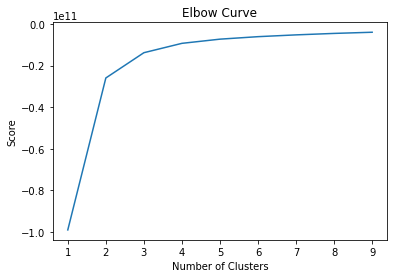

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is three.

## 3. k-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

KMeans(n_clusters=3)

In [18]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\Logan\AppData\Local\Temp\ipykernel_66792\4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [19]:
df_sub.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status N,clusters
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81,0,2
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28,0,2
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45,1,2
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51,1,2
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54,1,2


In [20]:
df_sub['clusters'].value_counts()

2    3692
0    1937
1    1414
Name: clusters, dtype: int64

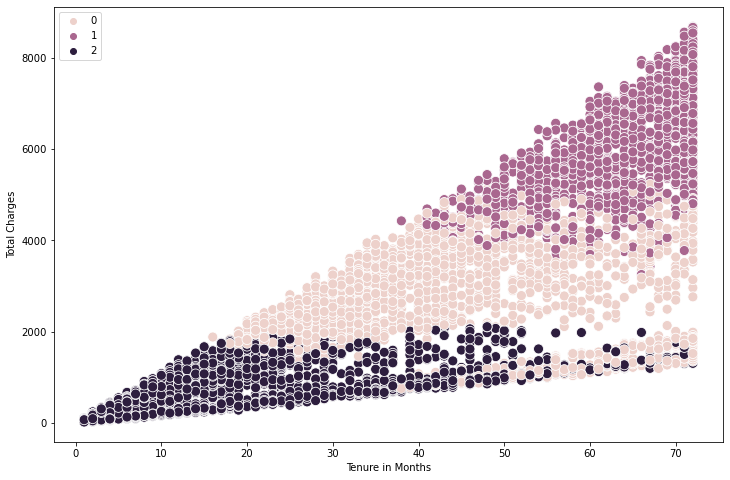

In [21]:
# Plot clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Tenure in Months'], y=df['Total Charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Tenure in Months') # Label x-axis.
plt.ylabel('Total Charges') # Label y-axis.
plt.show()

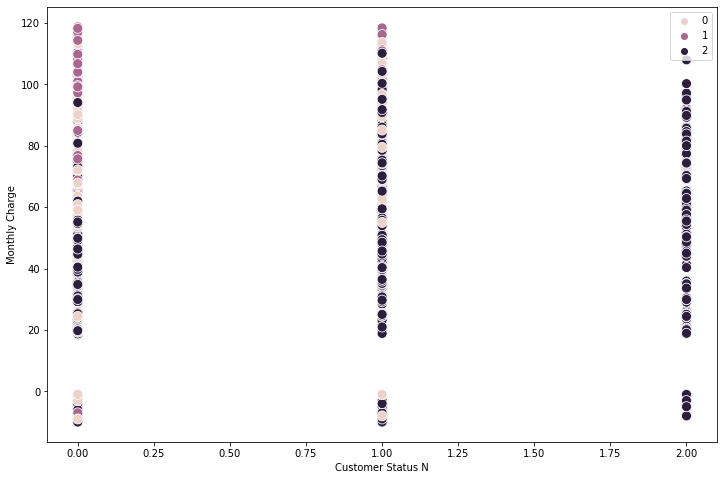

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Customer Status N'], y=df['Monthly Charge'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Customer Status N') 
plt.ylabel('Monthly Charge') 
plt.show()

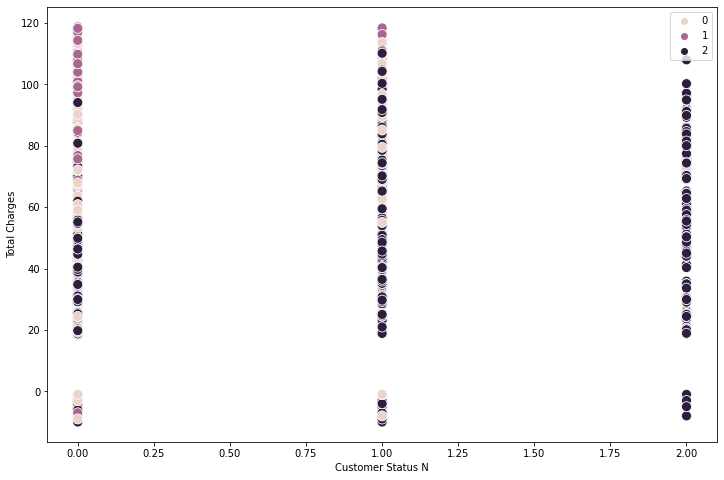

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Customer Status N'], y=df['Monthly Charge'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Customer Status N') 
plt.ylabel('Total Charges') 
plt.show()

In [24]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Logan\AppData\Local\Temp\ipykernel_66792\4010516523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [25]:
df_sub.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status N,clusters,cluster
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81,0,2,dark purple
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28,0,2,dark purple
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45,1,2,dark purple
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51,1,2,dark purple
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54,1,2,dark purple


In [26]:
df_sub[['clusters', 'cluster']].value_counts()

clusters  cluster    
2         dark purple    3692
0         pink           1937
1         purple         1414
dtype: int64

In [27]:
df_sub.groupby('cluster').agg({'Tenure in Months':['mean', 'median'], 
                         'Total Charges':['mean', 'median'], 
                         'Monthly Charge':['mean','median'],
                         'Age':['mean', 'median'],
                          'Customer Status N':['mean', 'median', 'count']})

Tenure in Months        Total Charges         Monthly Charge  \
                        mean median          mean  median           mean   
cluster                                                                    
dark purple        13.999187   10.0    579.141303   434.3      50.158275   
pink               44.792463   43.0   2759.329711  2665.0      66.694476   
purple             63.403112   65.0   6066.275743  5969.9      94.438472   

                           Age        Customer Status N               
             median       mean median              mean median count  
cluster                                                               
dark purple  49.475  45.714789   45.0          0.599404    0.0  3692  
pink         71.600  47.252969   47.0          0.189468    0.0  1937  
purple       98.250  47.567185   47.0          0.139321    0.0  1414

In [28]:
df[['Customer Status', 'Customer Status N']].value_counts()

Customer Status  Customer Status N
Stayed           0                    4720
Churned          1                    1869
Joined           2                     454
dtype: int64

#### Judging by these statistics:

- The purple cluster has the best stats in almost all categories. The median tenure in months for this type of customer is 65, which is significantly larger than the other two. It also has the highest total charges.
- The age of the customer doesn’t seem to matter much. The age profiles for all 3 clusters are similar in being late 40s.
- Looking at 'Customer Status N', 1 = churned customer. Pink cluster is closest to 1 with a mean of .59. This could imply the following characteristics of a churned customer: New to LD&W (median of 10 months tenure), lower monthly and total charges. Overall, these are newer customers trying LD&W services before deciding that a service or feature is not to their liking. 
- In addition, pink cluster has the most points and implies that there are many new customers coming to LD&W as well as customers churning.

In [29]:
# Export
df_sub.to_csv(os.path.join(path, '02 Data','Prepared Data', 'cluster analysis.csv'))